### Tasks

#### We'll Use the data to complete the following tasks :

    Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

    Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

    Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value.

    Clean the data. Filter out the following patient segments that represent incorrect data:
        diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
        height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
        height is more than the 97.5th percentile
        weight is less than the 2.5th percentile
        weight is more than the 97.5th percentile

    Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Import data
df = pd.read_csv("../datasets/medical_examination.csv")

In [32]:
# Print dataset shape
print(f"This have {df.shape[0]} rows and {df.shape[1]} columns")


This have 70000 rows and 13 columns


In [33]:
# Print 5 first Rows of Dataset
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
# Identify data types un our dataset
df.dtypes

# Dataset have just quantitave data (Numerical)

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [35]:
# Basic Statistic of dataset
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Add 'overweight' column
df['overweight'] = (df["weight"] /(df["height"] / 100)**2 > 25) * 1

In [37]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"] = (df["cholesterol"] > 1) * 1
df["gluc"] = (df["gluc"] > 1) * 1
print(df['gluc'].value_counts())
print(df['cholesterol'].value_counts())

0    59479
1    10521
Name: gluc, dtype: int64
0    52385
1    17615
Name: cholesterol, dtype: int64


In [38]:
# Print 5 first row of dataset afther Normalization 
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [39]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=['cardio'] , value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [40]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).value_counts().reset_index()
df_cat.rename(columns={0:'total'}, inplace=True)

In [41]:
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


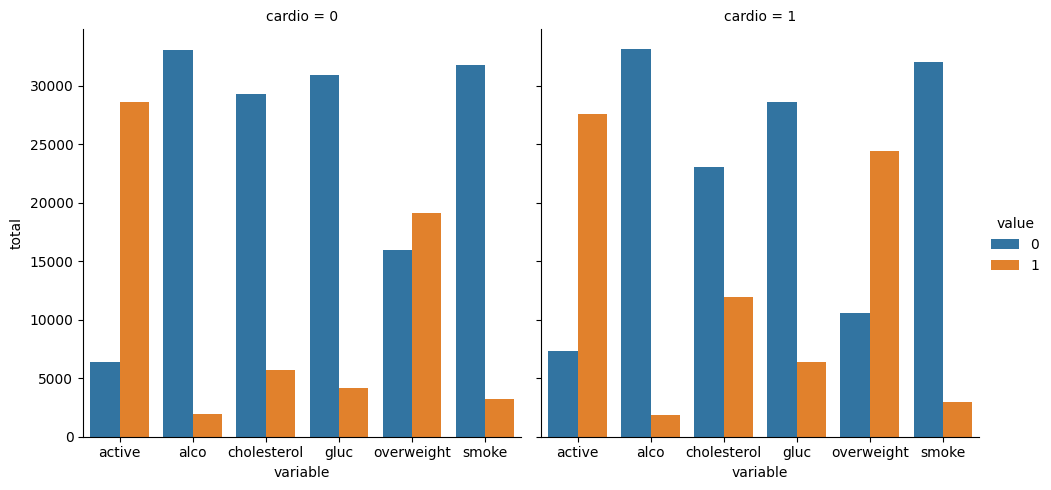

In [43]:
# Draw the catplot with 'sns.catplot()'
sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')

In [23]:
# Clean the data
df_heat = df[(df["ap_lo"] <= df["ap_hi"])&
                (df["height"] >= df["height"].quantile(0.025)) &
                (df["height"] <= df["height"].quantile(0.975)) &
                (df["weight"] >= df["weight"].quantile(0.025)) &
                (df["weight"] <= df["weight"].quantile(0.975))]

In [24]:
df_heat.shape

(63259, 14)

In [25]:
# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

In [26]:
corr.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,-0.003719,-0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000025
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,-0.129996,-0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.110267
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,0.037605,0.021357,0.337436,0.168637,0.007864,0.002320,-0.135588
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,0.063522,0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.266305
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,-0.135981,-0.107072,0.056533,0.059917,-0.014430,0.170042,0.862657


<AxesSubplot: >

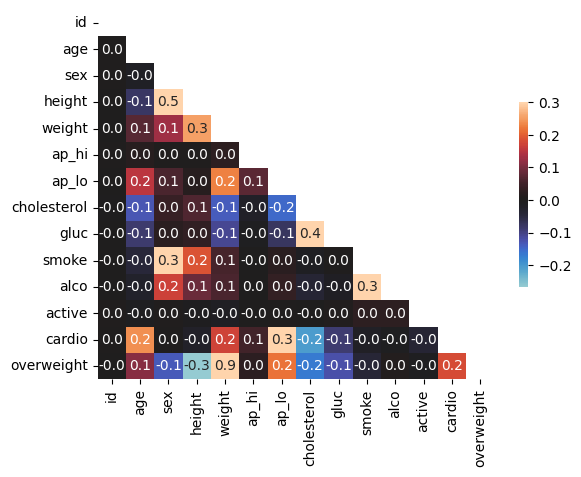

In [28]:
# Draw the heatmap with 'sns.heatmap()'
fig, ax = plt.subplots()
sns.heatmap(data=corr, mask=mask, annot=True, fmt=".1f", ax=ax, center=0, vmax=0.3, cbar_kws={'shrink':0.5})